In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2 as cv

import downloader as d 
import video as v

In [2]:
from typing import Tuple, Union
from numpy.typing import NDArray
from dataclasses import dataclass
from collections import deque

In [3]:
from importlib import reload

In [4]:
import skvideo.io as sio

In [8]:
#videodata = sio.vread("videos/Banned Pokemon Seizure Scene.mp4")  

In [4]:
reload(v)

<module 'video' from '/Users/nadina/Documents/codeup/epilator/video.py'>

In [5]:
def get_video(path: str) -> Tuple[NDArray, int]:
    vid = cv.VideoCapture(path)
    fps = vid.get(cv.CAP_PROP_FPS)
    #video = np.fromiter(vid, np.ndarray)
    frames = []
    ret = True
    while ret:
        ret, img = vid.read() # read one frame from the 'capture' object; img is (H, W, C)
        if ret:
            img = cv.resize(src=img, dsize=(100,100))
            frames.append(img)
    # dimensions (T, H, W, C)
    return np.stack(frames, axis=0), int(round(fps))

def get_vid_df(path: str) -> pd.DataFrame:
    vid,fps = get_video(path)
    frames = vid.shape[0]
    height = vid.shape[1]
    width = vid.shape[2]
    df = pd.DataFrame(vid.reshape((-1,3)))
    df['frame'] = df.index // (width * height)
    df['x'] = df.index % width
    df['y'] = df.index // width % height
    df['second'] = df.frame // fps
    df = df.set_index(['frame','y','x']).rename(columns={
        0:'hue',
        1:'lightness',
        2:'saturation',
    })
    df.attrs['fps'] = fps
    return df

In [82]:
get_video('videos/Banned Pokemon Seizure Scene.mp4')

(array([[[[ 36,  36,  36],
          [ 36,  36,  36],
          [ 34,  34,  34],
          ...,
          [ 17,  23,  18],
          [ 17,  23,  18],
          [ 17,  23,  18]],
 
         [[ 36,  36,  36],
          [ 36,  36,  36],
          [ 34,  34,  34],
          ...,
          [ 17,  23,  18],
          [ 17,  23,  18],
          [ 17,  23,  18]],
 
         [[ 36,  36,  36],
          [ 36,  36,  36],
          [ 34,  34,  34],
          ...,
          [ 17,  23,  18],
          [ 17,  23,  18],
          [ 17,  23,  18]],
 
         ...,
 
         [[ 96,  76,  78],
          [ 96,  76,  78],
          [ 96,  76,  78],
          ...,
          [ 99,  78, 216],
          [ 95,  78, 217],
          [ 95,  78, 217]],
 
         [[ 96,  76,  78],
          [ 96,  76,  78],
          [ 96,  76,  78],
          ...,
          [ 95,  75, 222],
          [ 93,  74, 224],
          [ 93,  74, 224]],
 
         [[ 96,  76,  78],
          [ 96,  76,  78],
          [ 96,  76,  78],
   

In [14]:
vid = v.Video('videos/Banned Pokemon Seizure Scene.mp4')

In [7]:
vid1 = cv.VideoCapture('videos/Banned Pokemon Seizure Scene.mp4')

In [8]:
type(vid1)

cv2.VideoCapture

In [6]:
df = get_vid_df('videos/Banned Pokemon Seizure Scene.mp4')

In [7]:
df.head()

hue  lightness  saturation  second
frame y x                                    
0     0 0   36         36          36       0
        1   34         34          34       0
        2   32         32          32       0
        3   31         31          31       0
        4   31         31          31       0

In [8]:
df.tail()

hue  lightness  saturation  second
frame y  x                                     
784   99 95   41         28          24      26
         96   42         29          25      26
         97   43         29          25      26
         98   44         29          25      26
         99   44         29          25      26

In [24]:
df.shape

(60288000, 3)

In [28]:
# pull fps (frames per second) from df attributes
fps = df.attrs['fps'] #30

In [49]:
# access number of frames
df.index.levels[0]

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            775, 776, 777, 778, 779, 780, 781, 782, 783, 784],
           dtype='int64', name='frame', length=785)

In [50]:
frames = df.index.levels[0]

In [53]:
len(frames)

785

In [54]:
# length of video in seconds. 26 / correct
len(frames) / fps

26.166666666666668

In [60]:
for frame in frames[:5]:
    print(df.loc[frame, 'lightness'])

y    x  
0    0      36
     1      36
     2      34
     3      34
     4      34
            ..
239  315    73
     316    75
     317    75
     318    74
     319    74
Name: lightness, Length: 76800, dtype: uint8
y    x  
0    0      36
     1      36
     2      34
     3      34
     4      34
            ..
239  315    73
     316    75
     317    75
     318    74
     319    74
Name: lightness, Length: 76800, dtype: uint8
y    x  
0    0      36
     1      36
     2      34
     3      34
     4      34
            ..
239  315    73
     316    75
     317    75
     318    74
     319    74
Name: lightness, Length: 76800, dtype: uint8
y    x  
0    0      36
     1      36
     2      34
     3      34
     4      34
            ..
239  315    73
     316    75
     317    75
     318    74
     319    74
Name: lightness, Length: 76800, dtype: uint8
y    x  
0    0      36
     1      36
     2      34
     3      34
     4      34
            ..
239  315    73
     316  

In [65]:
df.loc[:,'lightness'].max()

255

In [75]:
#df['seconds'] = df.index.levels[0] / fps

<AxesSubplot: xlabel='frame'>

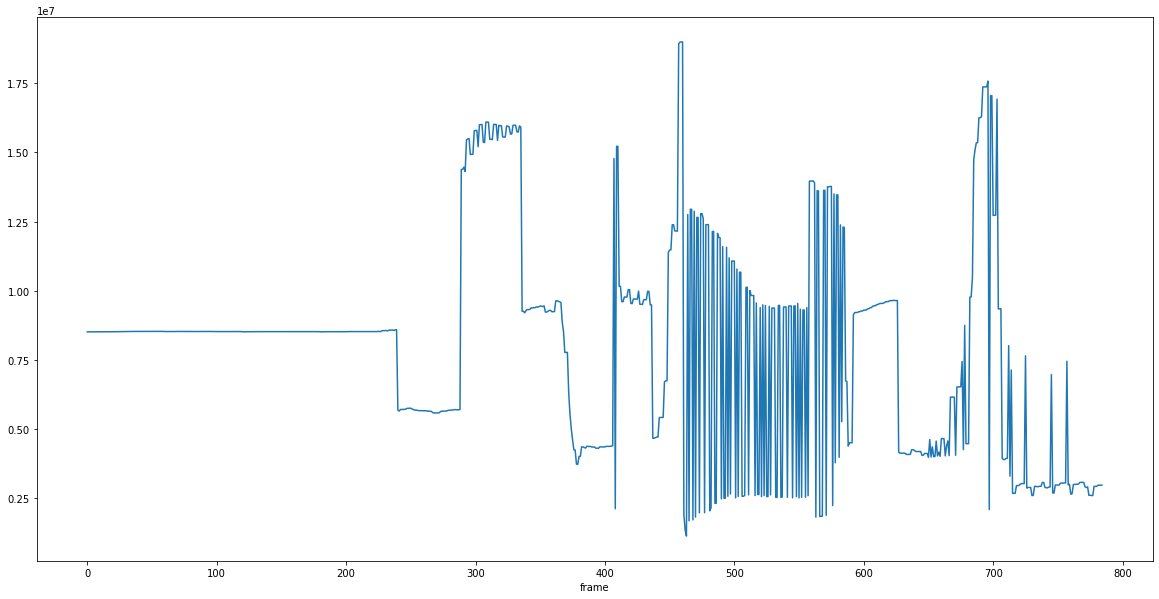

In [88]:
plt.figure(figsize=(20, 10))
df.groupby('frame').lightness.sum().plot.line()

<AxesSubplot: xlabel='second'>

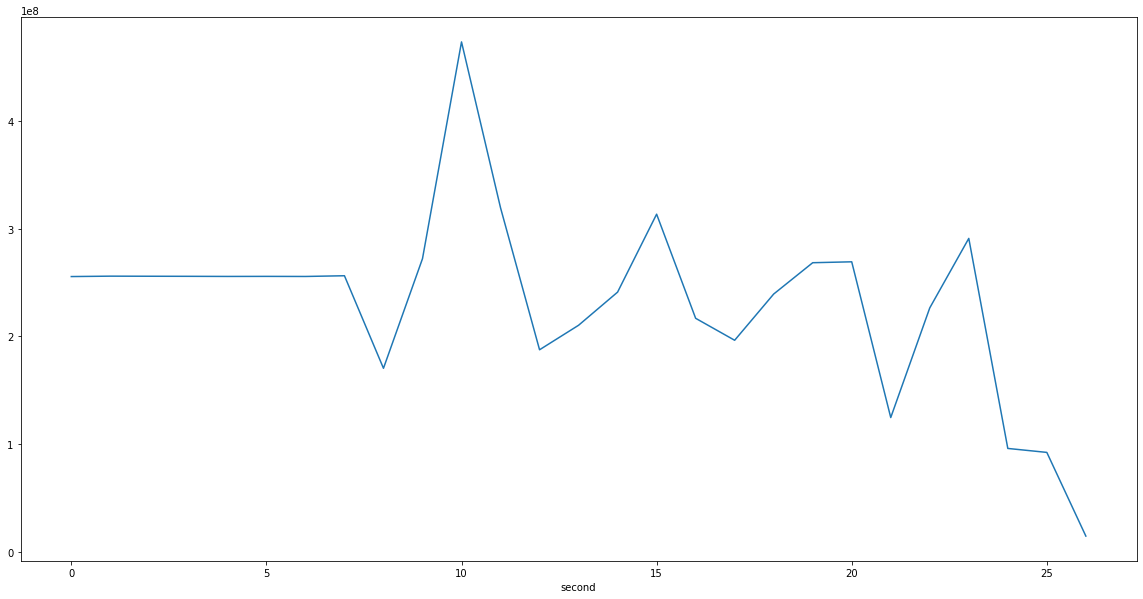

In [89]:
plt.figure(figsize=(20, 10))
df.groupby('second').lightness.sum().plot.line()

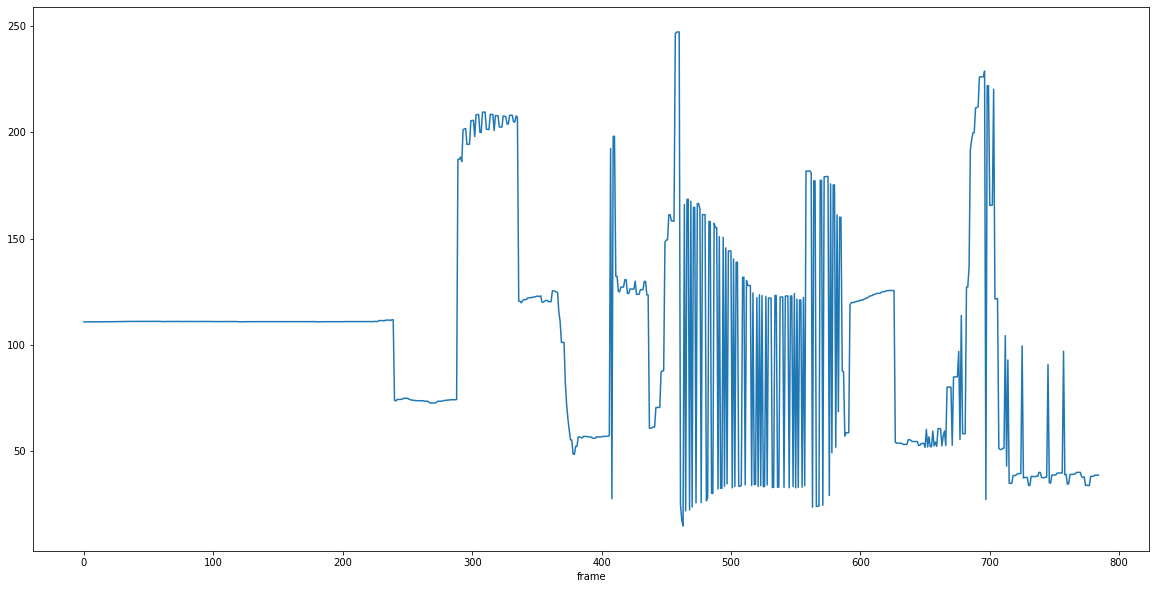

In [91]:
plt.figure(figsize=(20, 10))
df.groupby('frame').lightness.mean().plot.line();

<AxesSubplot: xlabel='second'>

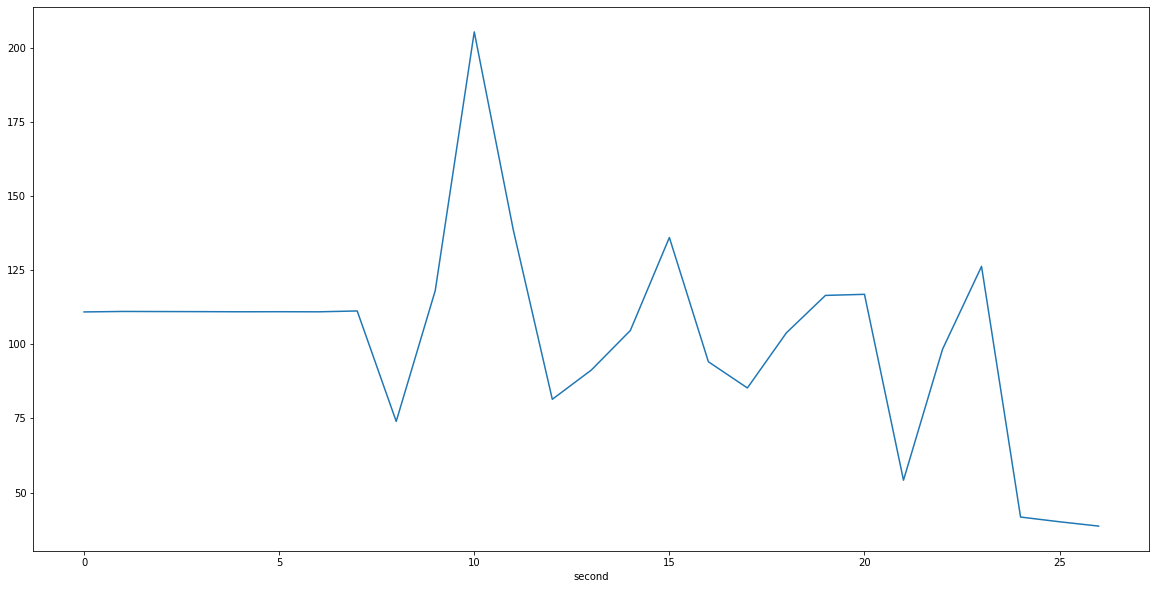

In [92]:
plt.figure(figsize=(20, 10))
df.groupby('second').lightness.mean().plot.line()

<AxesSubplot: >

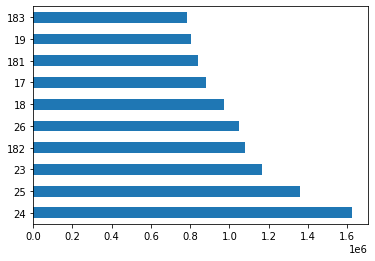

In [98]:
# most common lightness values
df.lightness.value_counts().head(10).plot.barh()

In [9]:
lightness_series = df.groupby('frame').lightness.mean()

In [101]:
lightness_series[:10]

frame
0    110.882747
1    110.890807
2    110.910703
3    110.900964
4    110.914505
5    110.911602
6    110.902943
7    110.905091
8    110.903633
9    110.901250
Name: lightness, dtype: float64

In [123]:

span = 3 # frames fer second

# compute midband
midband = lightness_series.ewm(span=span).mean()
stdev = lightness_series.ewm(span=span).std()

# compute upper and lower bands
ub = midband + stdev*3
lb = midband - stdev*3

In [124]:
detection = pd.concat([lightness_series,midband,lb, ub], axis=1)
detection.columns = ['average', 'moving_average', 'lower_band', 'upper_band']

In [125]:
detection.head()

,average,moving_average,lower_band,upper_band
frame,,,,
0,110.882747,110.882747,NaN,NaN
1,110.890807,110.888121,110.871023,110.905218
2,110.910703,110.901025,110.855589,110.946461
3,110.900964,110.900992,110.871247,110.930737
4,110.914505,110.907967,110.875577,110.940356


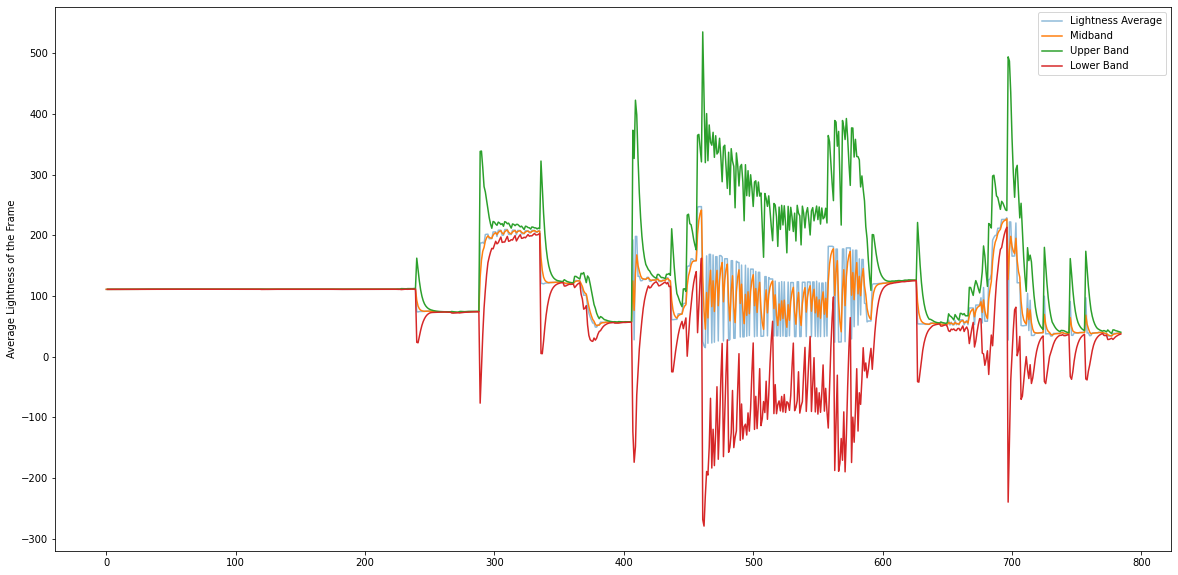

In [126]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(detection.index, detection.average, label='Lightness Average', alpha=0.5)

ax.plot(detection.index, detection.moving_average, label = 'Midband')
ax.plot(detection.index, detection.upper_band, label = 'Upper Band')
ax.plot(detection.index, detection.lower_band, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Average Lightness of the Frame')

plt.show()

### Calculate and graph the difference in lightness

In [10]:
lightness_df = lightness_series.to_frame()

In [245]:
lightness_df.head()

,lightness
frame,
0,110.882747
1,110.890807
2,110.910703
3,110.900964
4,110.914505


In [11]:
lightness_df['next_frame'] = lightness_df.lightness.shift(1)

In [12]:
lightness_df['difference'] = lightness_df.next_frame - lightness_df.lightness

In [13]:
lightness_df.head()

,lightness,next_frame,difference
frame,,,
0,110.8892,NaN,NaN
1,110.8963,110.8892,-0.0071
2,110.9175,110.8963,-0.0212
3,110.9072,110.9175,0.0103
4,110.9228,110.9072,-0.0156


Text(0.5, 1.0, 'Difference in brightnes between frames')

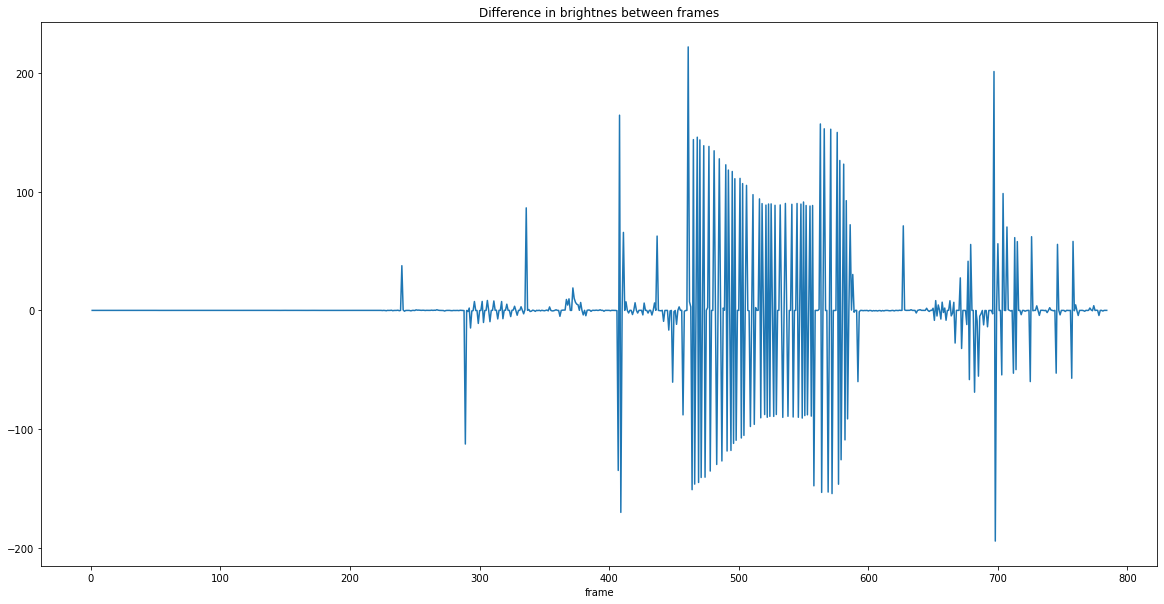

In [14]:
plt.figure(figsize=(20,10))
lightness_df.loc[:, 'difference'].plot()
plt.title('Difference in brightnes between frames')

Text(0.5, 1.0, 'Difference in brightnes between frames, start frame 500')

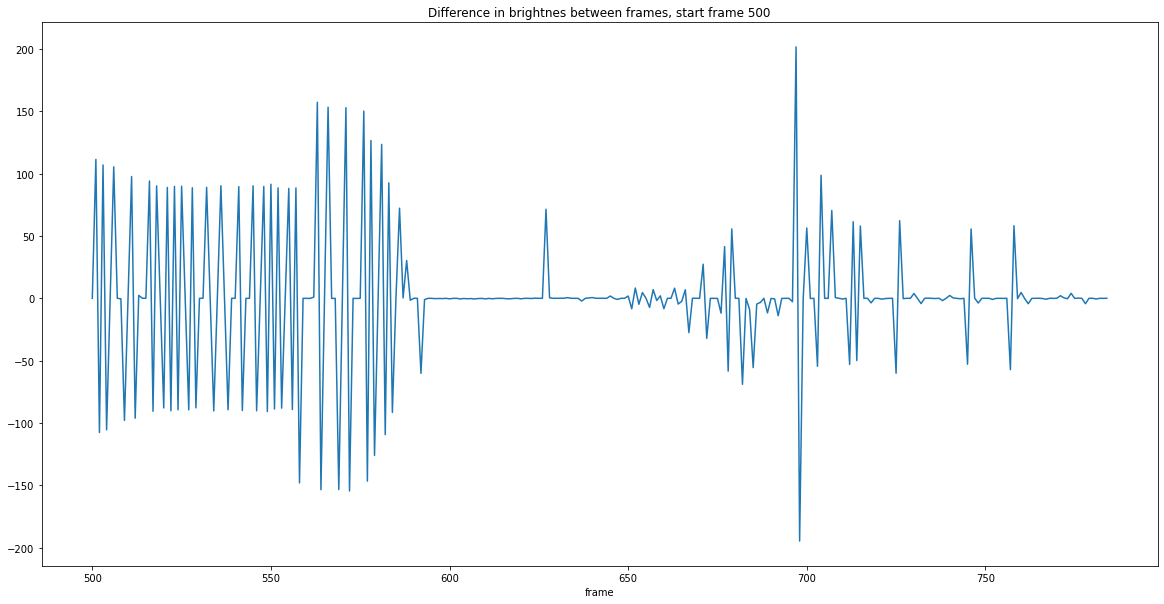

In [250]:
plt.figure(figsize=(20,10))
lightness_df.loc[500:, 'difference'].plot()
plt.title('Difference in brightnes between frames, start frame 500')

In [16]:

# span to calculate exponential average of # frames fer second
span = 30 

# compute midband
lightness_df['midband'] = lightness_df.difference.ewm(span=span).mean()

lightness_df['stand_dev'] = lightness_df.difference.ewm(span=span).std()

# compute upper and lower bands
lightness_df['upper_band'] = lightness_df.midband + 0.5*lightness_df.stand_dev
lightness_df['lower_band'] = lightness_df.midband - 0.5*lightness_df.stand_dev





In [286]:
lightness_df.head()

,lightness,next_frame,difference,midband,stand_dev,upper_band,lower_band,pct_b
frame,,,,,,,,
0,110.882747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110.890807,110.882747,-0.008060,-0.008060,NaN,NaN,NaN,NaN
2,110.910703,110.890807,-0.019896,-0.014175,0.008369,-0.009990,-0.018360,0.011760
3,110.900964,110.910703,0.009740,-0.005666,0.015191,0.001929,-0.013262,1.224383
4,110.914505,110.900964,-0.013542,-0.007836,0.012853,-0.001410,-0.014263,0.182939


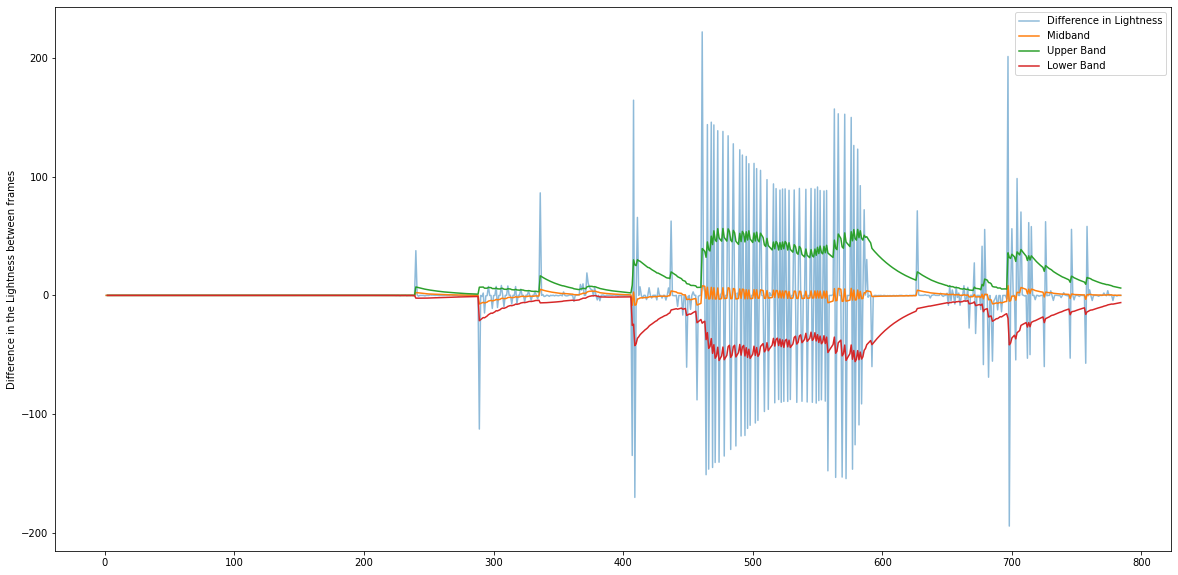

In [17]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(lightness_df.index, lightness_df.difference, label='Difference in Lightness', alpha=0.5)

ax.plot(lightness_df.index, lightness_df.midband, label = 'Midband')
ax.plot(lightness_df.index, lightness_df.upper_band, label = 'Upper Band')
ax.plot(lightness_df.index, lightness_df.lower_band, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Difference in the Lightness between frames')

plt.show()

With the span = 3 (and 30) and standard deviation = 1 we can catch unwanted "vibrations", difference in lightness between picture frames. In this case the lower band is ABOVE the midband.

𝐵𝑎𝑛𝑑𝑤𝑖𝑑𝑡ℎ=(𝑈𝐵−𝐿𝐵)/𝑚𝑖𝑑𝑏𝑎𝑛𝑑

### %b, Percent Bandwidth

Shows where the last value sits in relation to the bands.

%b = last−LB / UB-LB

- If %b > 1, data point lies above the upper band
- If %b < 0, data point lies below the lower band
- If %b == .5, data point lies on the midband.

In [19]:

lightness_df['pct_b'] = (lightness_df.difference - lightness_df.lower_band)/\
    (lightness_df.upper_band - lightness_df.lower_band)

In [289]:
lightness_df.head()

,lightness,next_frame,difference,midband,stand_dev,upper_band,lower_band,pct_b
frame,,,,,,,,
0,110.882747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110.890807,110.882747,-0.008060,-0.008060,NaN,NaN,NaN,NaN
2,110.910703,110.890807,-0.019896,-0.014175,0.008369,-0.009990,-0.018360,-0.183537
3,110.900964,110.910703,0.009740,-0.005666,0.015191,0.001929,-0.013262,1.514136
4,110.914505,110.900964,-0.013542,-0.007836,0.012853,-0.001410,-0.014263,0.056114


In [20]:
lightness_df[(lightness_df.difference < lightness_df.lower_band) |
    (lightness_df.difference > lightness_df.upper_band)].equals(lightness_df[(lightness_df.pct_b > 1) | (lightness_df.pct_b < 0)])

True

In [290]:
lightness_df[(lightness_df.pct_b > 1) | (lightness_df.pct_b < 0)]

,lightness,next_frame,difference,midband,stand_dev,upper_band,lower_band,pct_b
frame,,,,,,,,
2,110.910703,110.890807,-0.019896,-0.014175,0.008369,-0.009990,-0.018360,-0.183537
3,110.900964,110.910703,0.009740,-0.005666,0.015191,0.001929,-0.013262,1.514136
5,110.911602,110.914505,0.002904,-0.005393,0.012045,0.000630,-0.011415,1.188782
6,110.902943,110.911602,0.008659,-0.002644,0.012225,0.003469,-0.008756,1.424540
10,110.894570,110.901250,0.006680,-0.000255,0.009171,0.004331,-0.004840,1.256155
...,...,...,...,...,...,...,...,...
726,37.440820,99.623437,62.182617,2.750204,44.770073,25.135241,-19.634833,1.827503
745,90.808021,37.944635,-52.863385,-2.647046,27.335699,11.020804,-16.314895,-1.337024
746,35.201628,90.808021,55.606393,1.111241,30.181155,16.201818,-13.979337,2.305602


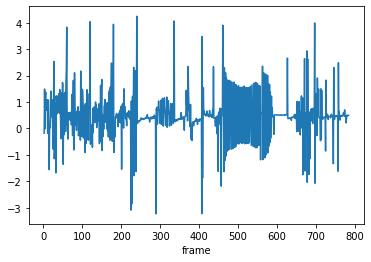

In [21]:
lightness_df.pct_b.plot();

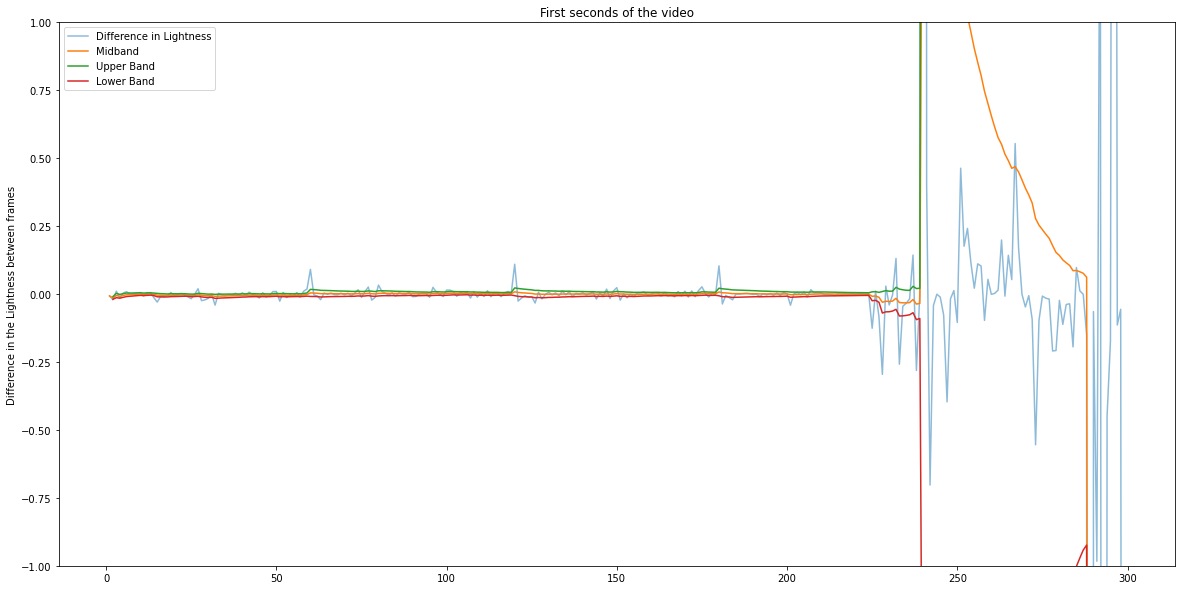

In [22]:
# closer look on the beginning. Why first frames show anomaly?

# don't change the graph, it show STD = 0.5
ld = lightness_df[:300]
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(ld.index, ld.difference, label='Difference in Lightness', alpha=0.5)

ax.plot(ld.index, ld.midband, label = 'Midband')
ax.plot(ld.index, ld.upper_band, label = 'Upper Band')
ax.plot(ld.index, ld.lower_band, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Difference in the Lightness between frames')
plt.ylim(-1, 1)
plt.title('First seconds of the video')
plt.show()

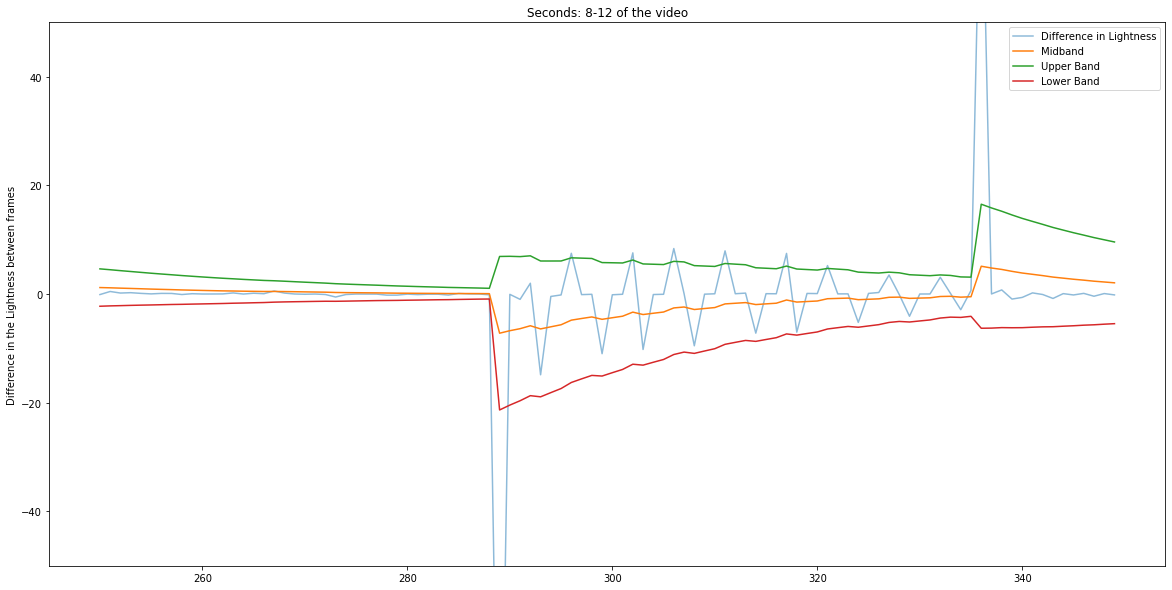

In [23]:
# closer look on the beginning. Why first frames show anomaly?

# don't change the graph, it show STD = 0.5
ld = lightness_df[250:350]
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(ld.index, ld.difference, label='Difference in Lightness', alpha=0.5)

ax.plot(ld.index, ld.midband, label = 'Midband')
ax.plot(ld.index, ld.upper_band, label = 'Upper Band')
ax.plot(ld.index, ld.lower_band, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Difference in the Lightness between frames')
plt.ylim(-50, 50)
plt.title('Seconds: 8-12 of the video')
plt.show()

The problem with this method:
- It does catch big differences. 
- First seconds of the video the picture doesn't change at all, but the intial frames are in the anomalies
- Around second 10 there lots of flashes on the video, but they are not recognized as anomaly with the Bollinger Bands.